### Superb AI Suite(Python SDK) 사용법 정리

In [1]:
import spb.sdk
print(f'This version: v{spb.sdk.__version__}')

This version: v0.9.0


In [2]:
client = spb.sdk.Client(project_name='test')

print('Project Name: {}'.format(client.get_project_name()))
print('Total numberr of data: {}'.format(client.get_num_data()))

Project Name: test
[WARNING] Data list is empty
Total numberr of data: 0


In [20]:
IMAGE_DIR = 'upload-test/*.jpg'
DATASET = 'test'

import glob
import os

In [12]:
file = list(glob.glob(IMAGE_DIR))
file[1] # 파일 경로 하나 예시

'upload-test\\A133134000000MT0020001LV.jpg'

### upload Images

In [23]:
for image_path in glob.glob(IMAGE_DIR):
    image_name = os.path.basename(image_path) # 경로 중 파일명만 읽기
    client.upload_image(image_path, DATASET, key=image_name) # key 값이 같으면 업로드 불가

### Check uploaded Images

In [32]:
def get_data(dataset, page_size=10):
    num_data = client.get_num_data(dataset=dataset)
    print(f'# of images in {DATASET}: {num_data}')
    print(f'# of pages in {DATASET}: {page_size}')
    num_pages = (num_data + page_size -1) // page_size
    for page_idx in range(num_pages):
        for data_handler in client.get_data_page(page_idx=page_idx, page_size=page_size, dataset=dataset):
            # print(data_handler.get_key())
            yield data_handler

uploaded_data = {}
for data_handler in get_data(DATASET):
    dataset = data_handler.get_dataset_name()
    data_key = data_handler.get_key()
    uploaded_data[(dataset, data_key)] = data_handler

print(list(uploaded_data.keys()))

# of images in test: 29
# of pages in test: 10
[('test', 'A133134000000MT0020002SV.jpg'), ('test', 'A133134000000MT0020002SH.jpg'), ('test', 'A133000000000MT0020001LV.jpg'), ('test', '<function basename at 0x000002B01B2C8EE0>'), ('test', 'A133134000000MT0020001LV.jpg'), ('test', 'A133134000000MT0020002LV.jpg'), ('test', 'A133134000000MT0020002LH.jpg'), ('test', 'A133134000000MT0020001SV.jpg'), ('test', 'A133134000000MT0020001SH.jpg'), ('test', 'A133134000000MT0020003SH.jpg'), ('test', 'A133134135000MT0030001LV.jpg'), ('test', 'A134000000000MT0020004SH.jpg'), ('test', 'A133134000000MT0020004SH.jpg'), ('test', 'A134000000000MT0020005SH.jpg'), ('test', 'A134000000000MT0020004SV.jpg'), ('test', 'A134000000000MT0020002SH.jpg'), ('test', 'A134000000000MT0020003SV.jpg'), ('test', 'A133134000000MT0020003SV.jpg'), ('test', 'A134000000000MT0020003SH.jpg'), ('test', 'A133134000000MT0020004SV.jpg'), ('test', 'A134135000000MT0020001SH.jpg'), ('test', 'A134000000000MT0020005SV.jpg'), ('test', 'A1341

### 특정 data_key 검색 방법

In [37]:
try:
    data_handler = next(client.get_data_page(page_idx=0, page_size=1, dataset=DATASET, data_key='A133134000000MT0020002SH.jpg'))
except StopIteration:
    print("데이터 존재하지 않음")
else:
    print(f'{data_handler.get_dataset_name()}, {data_handler.get_key()}')

test, A133134000000MT0020002SH.jpg


# of images in test: 29
# of pages in test: 10
A133134135000MT0030001LV.jpg


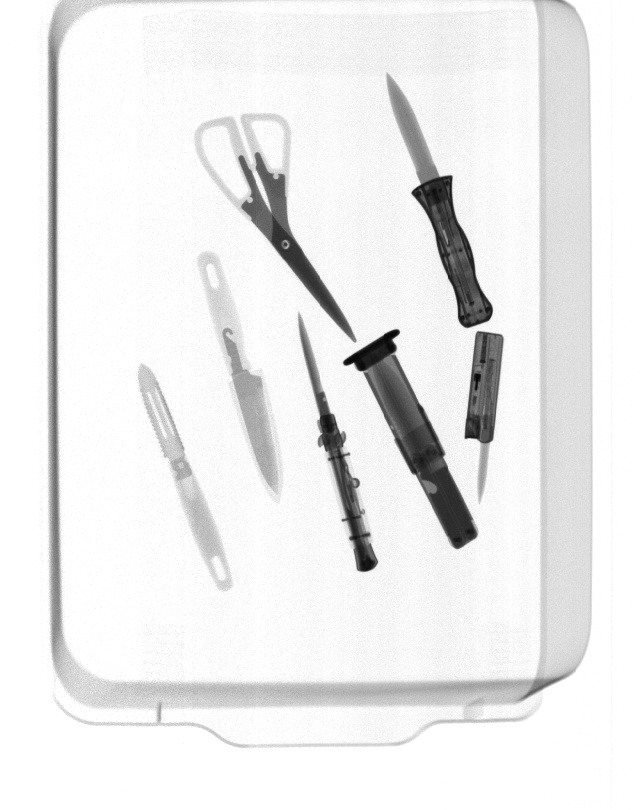

In [38]:
images = {}
for data_handler in get_data(DATASET):
    dataset = data_handler.get_dataset_name()
    data_key = data_handler.get_key()
    images[(dataset, data_key)] = data_handler

import random
from PIL import Image
from IPython.display import display
import requests
data_handler = random.choice(list(images.values()))
print(data_handler.get_key())
image_url = data_handler.get_image_url()
img = Image.open(requests.get(image_url, stream=True).raw)
display(img)